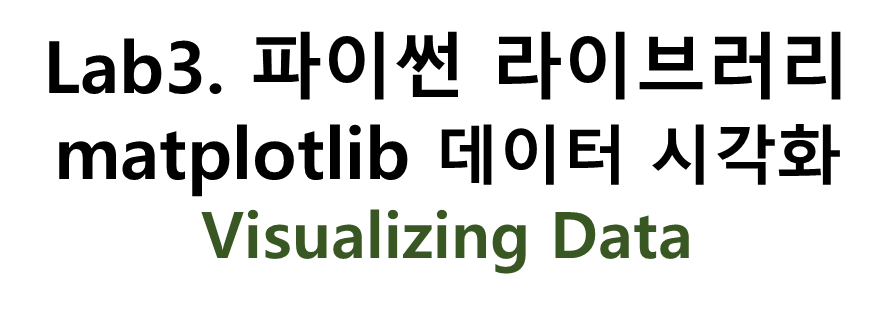  

   1. 간단한 그래프
   2. 막대 그래프
   3. 히스토그램
   4. 선 그래프
   5. 산점도간단한 그래프 Simple Graph

 * 데이터 과학자가 갖춰야 할 기본 기술 중 하나가 데이터 시각화입니다.
 * 좋은 시각화를 만드는 것은 상당히 어렵습니다.

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## 1. 간단한 그래프

In [2]:
# mpl.rc('font', family='Nanum Gothic')
mpl.rc('font',family='Dejavu Sans')

C:\Users\oweny\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47749 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\oweny\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47785 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\oweny\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 47749 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\oweny\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 47785 missing from current font.
  font.set_text(s, 0, flags=flags)


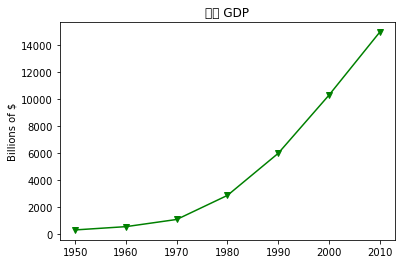

In [3]:
def make_simple_line_chart():
    years = [1950, 1960, 1970, 1980, 1990, 2000, 2010]
    gdp = [300.2, 543.3, 1075.9, 2862.5, 5979.6, 10289.7, 14958.3]

    # create a line chart, years on x-axis, gdp on y-axis
    plt.plot(years, gdp, color='green', marker='v', linestyle='solid')

    # add a title
    plt.title("명목 GDP")

    # add a label to the y-axis
    plt.ylabel("Billions of $")
    plt.show()

make_simple_line_chart()

## 2. 막대 그래프

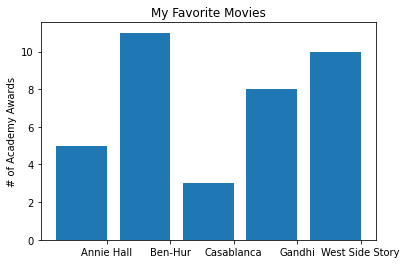

In [4]:
def make_simple_bar_chart():
    movies = ["Annie Hall", "Ben-Hur", "Casablanca", "Gandhi", "West Side Story"]
    num_oscars = [5, 11, 3, 8, 10]

    # bars are by default width 0.8, so we'll add 0.1 to the left coordinates
    # so that each bar is centered
    xs = [i + 0.1 for i, _ in enumerate(movies)]  # 밑줄 문자 ‘_’ 좌우에 빈칸 넣어 구분
    # xs = [0.1, 1.1, 2.1, 3.1, 4.1], 일반적으로 _ 변수는 쓰지 않는 변수를 할당할 때 사용함
    
    # plot bars with left x-coordinates [xs], heights [num_oscars]
    plt.bar(xs, num_oscars)
    plt.ylabel("# of Academy Awards")
    plt.title("My Favorite Movies")

    # label x-axis with movie names at bar centers
    plt.xticks([i + 0.5 for i, _ in enumerate(movies)], movies) # 밑줄 문자 ‘_’ 좌우에 빈칸 넣어 구분

    plt.show()

make_simple_bar_chart()


## 3. 히스토그램(도수분포)

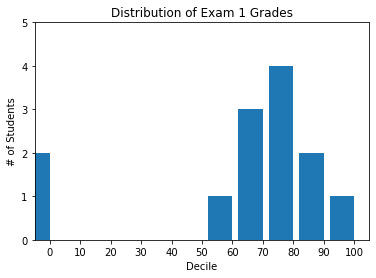

In [5]:
def make_histogram():
    from collections import Counter

    grades = [83,95,91,87,70,0,85,82,100,67,73,77,0]
    decile = lambda grade: grade // 10 * 10 # 나눈 몫을 10배
    # lambda 함수...
    # def decile(grade):
    #     return grade // 10 * 10
    histogram = Counter(decile(grade) for grade in grades)
    # Counter([grade // 10 * 10 for grade in grades])
    # Counter({80: 4, 70: 3, 0: 2, 90: 2, 100: 1, 60: 1})

    plt.bar([x - 4 for x in histogram.keys()], # 각 막대를 4만큼 왼쪽으로 이동
            histogram.values(),                 #각 막대에 올바른 높이 설정
            8)                                  # 막대의 넓이를 8로 설정
    plt.axis([-5, 105, 0, 5])                   # x 축은 -5부터 105까지
                                                # y 축은 0부터 5까지
    plt.xticks([10 * i for i in range(11)])    # x 축 레이블은 0, 10, ..., 100
    plt.xlabel("Decile")
    plt.ylabel("# of Students")
    plt.title("Distribution of Exam 1 Grades")
    plt.show()

make_histogram()

In [6]:
### 3-1. hist() 활용 쉬운 히스토그램

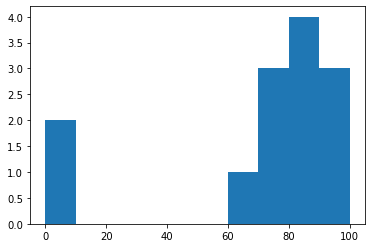

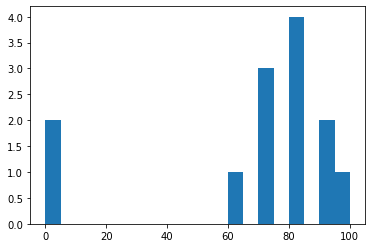

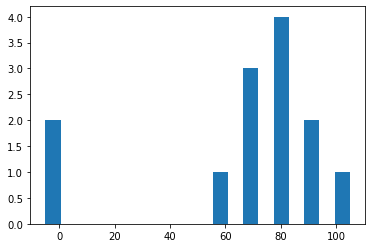

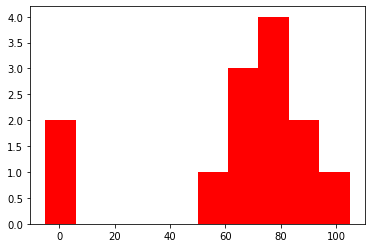

In [7]:
grades = np.array([83,95,91,87,70,0,85,82,100,67,73,77,0])
grade = grades // 10 *10
plt.hist(grade);       # default bins=10...10, 20, 30, ..., 100
plt.show()

# bins : 계급 구간의 개수, range : 범위
plt.hist(grade, bins=20); # 5, 10, 15, 20, ..., 95, 100
plt.show()

plt.hist(grade, bins=20, range=(grade.min()-5, grade.max()+5));
plt.show()

plt.hist(grade, bins=10,  range=(grade.min()-5, grade.max()+5), 
         alpha=1, histtype='stepfilled', color='red', # alpha : 투명도 histtype : 그래프 모양
         edgecolor='none');
plt.show()

## 4. 선 그래프
### Bias(편향)-Variance(분산) Trade-off

In [ ]:
def make_several_line_charts():
    variance     = [1,2,4,8,16,32,64,128,256]
    bias_squared = [256,128,64,32,16,8,4,2,1]
    total_error  = [x + y for x, y in zip(variance, bias_squared)]
    # [257, 130, 68, 40, 32, 40, 68, 130, 257]

    xs = range(len(variance))

    # we can make multiple calls to plt.plot
    # to show multiple series on the same chart
    plt.plot(xs, variance,     'g-',  label='variance')    # green solid line
    plt.plot(xs, bias_squared, 'r-.', label='bias^2')      # red dot-dashed line
    plt.plot(xs, total_error,  'b:',  label='total error') # blue dotted line

    # because we've assigned labels to each series
    # we can get a legend for free
    # loc=9 means "top center"
    plt.legend(loc=9)
    plt.xlabel("model complexity")
    plt.title("The Bias-Variance Tradeoff")
    plt.show()

make_several_line_charts()

## 선 색상과 스타일

In [ ]:
x = np.linspace(0, 10, 1000)

plt.plot(x, np.sin(x - 0), color='blue')        # specify color by name
plt.plot(x, np.sin(x - 1), color='g')           # short color code (rgbcmyk)
plt.plot(x, np.sin(x - 2), color='0.75')        # Grayscale between 0 and 1
plt.plot(x, np.sin(x - 3), color='#FFDD44')     # Hex code (RRGGBB from 00 to FF)
plt.plot(x, np.sin(x - 4), color=(1.0,0.2,0.3)) # RGB tuple, values 0 to 1
plt.plot(x, np.sin(x - 5), color='chartreuse'); # all HTML color names supported

In [ ]:
plt.plot(x, x + 0, linestyle='solid')
plt.plot(x, x + 1, linestyle='dashed')
plt.plot(x, x + 2, linestyle='dashdot')
plt.plot(x, x + 3, linestyle='dotted');

# For short, you can use the following codes:
plt.plot(x, x + 4, linestyle='-')  # solid
plt.plot(x, x + 5, linestyle='--') # dashed
plt.plot(x, x + 6, linestyle='-.') # dashdot
plt.plot(x, x + 7, linestyle=':');  # dotted

In [ ]:
plt.plot(x, x + 0, '-g')  # solid green
plt.plot(x, x + 1, '--c') # dashed cyan
plt.plot(x, x + 2, '-.k') # dashdot black
plt.plot(x, x + 3, ':r');  # dotted red

# 5. 산점도

In [ ]:
# 친구의 수와 사이트 체류 시간에 관한 산점도
def make_scatter_plot():
    friends = [ 70, 65, 72, 63, 71, 64, 60, 64, 67]
    minutes = [175, 170, 205, 120, 220, 130, 105, 145, 190]
    labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i']

    plt.scatter(friends, minutes)

    # label each point
    for label, friend_count, minute_count in zip(labels, friends, minutes):
        plt.annotate(label,
                 xy=(friend_count, minute_count), # put the label with its point
                 xytext=(5, -5), # but slightly offset, 각 점에 대한 라베링이 떨어진 거리 x축, y축
                 textcoords='offset points')

    plt.title("Daily Minutes vs. Number of Friends")
    plt.xlabel("# of friends")
    plt.ylabel("daily minutes spent on the site")
    plt.show()

make_scatter_plot()

# 더 공부하고 싶다면
 * seaborn : matplotlib을 발전시킨 라이브러리  
 built on top of matplotlib and allows you to easily produce prettier (and more complex) visualizations.  
 * D3.js : 웹을 위한 인터랙티브 시각화 자바스트립트 라이브러리  
 a JavaScript library for producing sophisticated interactive visualizations for the web.  
 Although it is not in Python, it is both trendy and widely used, and it is well worth your while to be familiar with it.  
 * Bokeh : 파이썬용 D3.js 스타일 시각화 신생 라이브러리  
 a newer library that brings D3-style visualizations into Python. 

## (Lab3) Visualizing Data
**이러닝의 data.csv 파일 안의 값들을 아래 내용을 포함하여 시각화 해보십시오**  
(“data.csv” 파일은 x축과 y축의 2차원 공간 상의 100개 좌표 값들을 한 라인에 한 좌표씩 콤마 “,”로 구분하여 기록한 파일입니다)
  * title
  * x label
  * y label